**This notebook presents ocean heat content for Pacific ocean basin.** 
- Author: Juliet Mulcahy 
- Tun34868@temple.edu

**What is heat content?**

- make sure im doing  different ocean levels
- use all data sets

In [63]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy
import cartopy.crs as ccrs
import cmocean 
import pandas as pd

In [64]:
woa18_1955_64_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_1955_1964_temperature',decode_times=False).potential_temperature
woa18_1965_74_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_1965_1974_temperature',decode_times=False).potential_temperature
woa18_1975_84_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_1975_1984_temperature',decode_times=False).potential_temperature
woa18_1985_94_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_1985_1994_temperature',decode_times=False).potential_temperature
woa18_1994_04_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_1995_2004_temperature',decode_times=False).potential_temperature
woa18_2005_17_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_2005_2017_temperature',decode_times=False).potential_temperature
woa18_decav_potential_temp = xr.open_zarr('/home/ees_student/Final_Project_G1_Mulcahy/data/woa18/woa18_decav_temperature',decode_times=False).potential_temperature

In [65]:
woa18_1955_64_potential_temp

<xarray.DataArray 'potential_temperature' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-potential_temperature, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

In [66]:
woa18_basins = xr.open_dataset('/home/ees_student/Final_Project_G1_Mulcahy/data/basins/woa18_basins_mask.nc',decode_times=False).mask

In [67]:
woa18_basins

<xarray.DataArray 'mask' (lat: 180, lon: 360)>
[64800 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     float32 ...
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

Text(0.5, 1.0, 'Ocean Basin Mask')

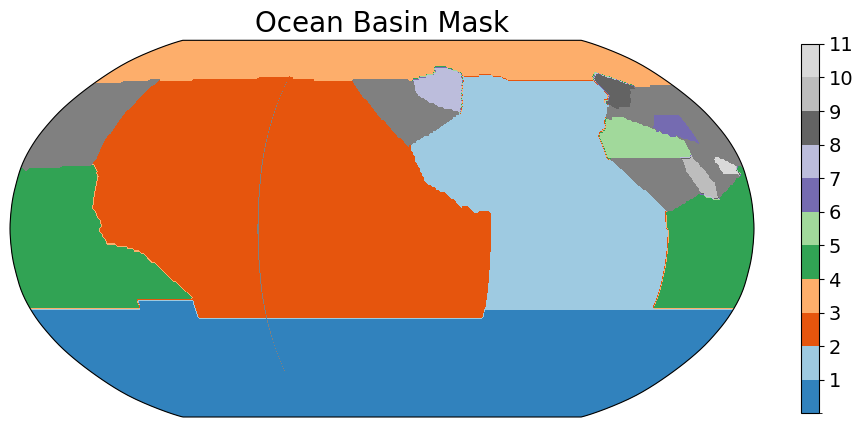

In [68]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [69]:
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over atlantic, NaN elsewhere
indianocean = (woa18_basins.where(woa18_basins==5) / woa18_basins.where(woa18_basins==5)) ### Values 1 over atlantic, NaN elsewhere
atlanticocean =(woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2))
pacificocean = (woa18_basins.where(woa18_basins==3) / woa18_basins.where(woa18_basins==3))
arcticocean = (woa18_basins.where(woa18_basins==4) / woa18_basins.where(woa18_basins==4))


In [70]:
pacificocean

<xarray.DataArray 'mask' (lat: 180, lon: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
    time     float32 438.0
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

Text(0.5, 1.0, 'Pacific Ocean')

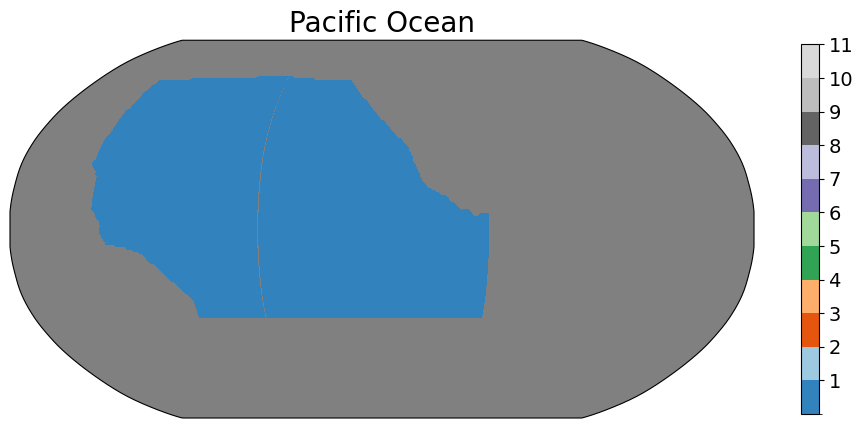

In [71]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = pacificocean.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific Ocean",fontsize=20)

In [72]:
ocean_heat_content_0_2000 = xr.open_dataset('/home/ees_student/Final_Project_G1_Mulcahy/data/heat_content_sea_level/heat_content_anomaly_0-2000_yearly.nc',
                                          decode_times=False)
ocean_heat_content_0_700 = xr.open_dataset('/home/ees_student/Final_Project_G1_Mulcahy/data/heat_content_sea_level/heat_content_anomaly_0-700_yearly.nc',
                                          decode_times=False)

In [73]:
ocean_heat_content_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [74]:
woa18_1955_64_pacific = woa18_1955_64_potential_temp*pacificocean

Text(0.5, 1.0, 'SST Pacific 1955 to 1964 averaged')

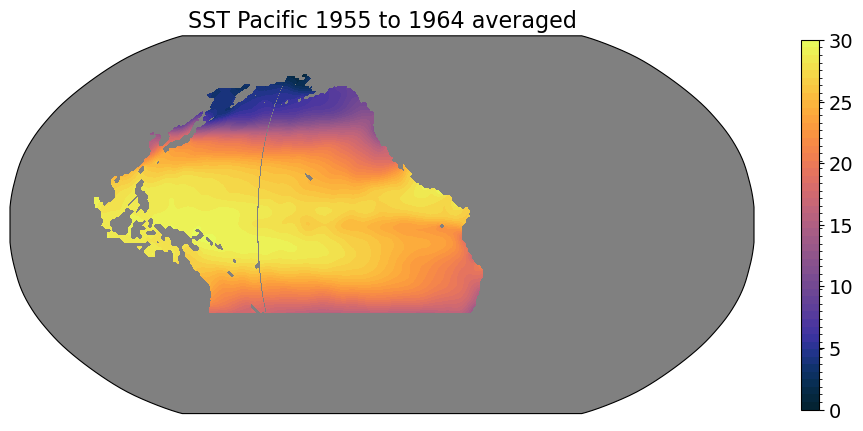

In [75]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1955_64_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Pacific 1955 to 1964 averaged",fontsize=16)

In [76]:
woa18_1955_64_pacific = woa18_1955_64_potential_temp*pacificocean

In [77]:
woa18_1965_74_pacific = woa18_1965_74_potential_temp*pacificocean

In [78]:
woa18_1975_84_pacific = woa18_1975_84_potential_temp*pacificocean

In [79]:
woa18_1985_94_pacific = woa18_1985_94_potential_temp*pacificocean

In [80]:
woa18_1994_04_pacific = woa18_1994_04_potential_temp*pacificocean

In [81]:
woa18_2005_17_pacific = woa18_2005_17_potential_temp*pacificocean

In [82]:
difference55_74 = woa18_1965_74_pacific - woa18_1955_64_pacific
difference55_84 = woa18_1975_84_pacific - woa18_1955_64_pacific
difference55_94 = woa18_1985_94_pacific - woa18_1955_64_pacific
difference55_04 = woa18_1994_04_pacific - woa18_1955_64_pacific
difference55_17 = woa18_2005_17_pacific - woa18_1955_64_pacific

Text(0.5, 1.0, 'SST Pacific Ocean 1975 to 1984 averaged')

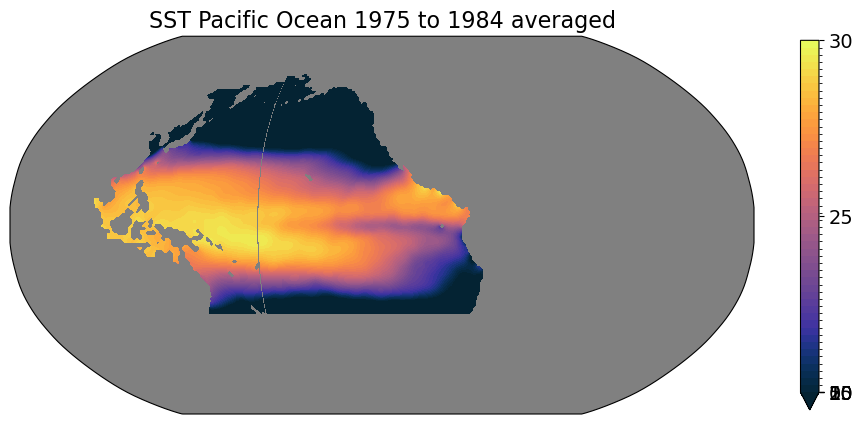

In [83]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1975_84_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=20,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Pacific Ocean 1975 to 1984 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Pacific Ocean 1965 to 1974 averaged')

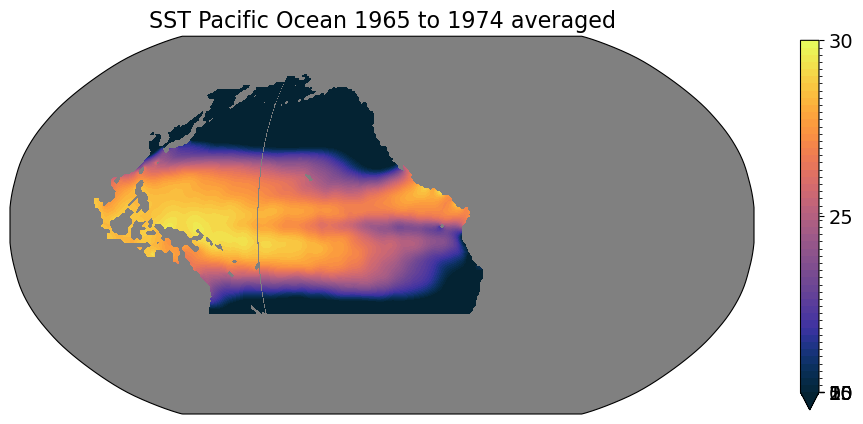

In [84]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1965_74_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=20,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Pacific Ocean 1965 to 1974 averaged",fontsize=16)

Text(0.5, 1.0, 'SST Pacific 2005 to 2017 averaged')

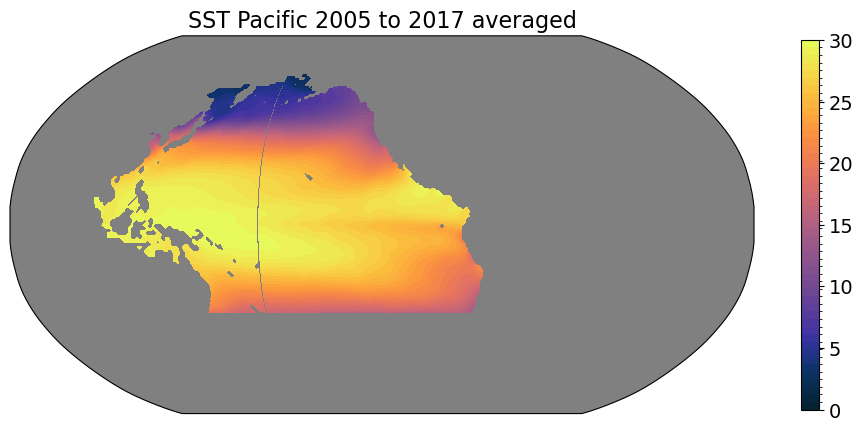

In [85]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_2005_17_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Pacific 2005 to 2017 averaged",fontsize=16)

Text(0.5, 1.0, 'Pacific SST difference from 1955 to 1974')

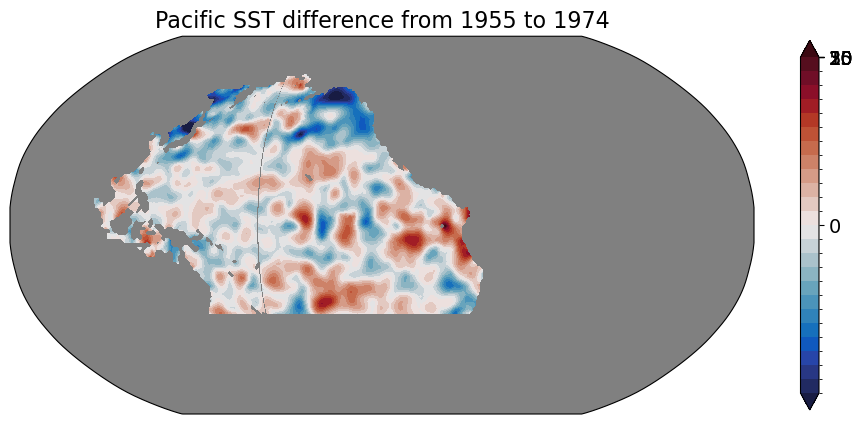

In [86]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = difference55_74.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific SST difference from 1955 to 1974",fontsize=16)

Text(0.5, 1.0, 'Pacific SST difference from 1955 to 1984')

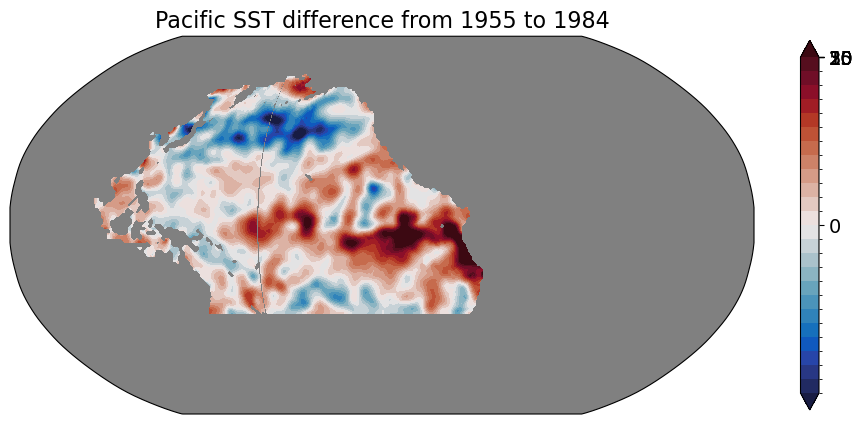

In [87]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = difference55_84.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific SST difference from 1955 to 1984",fontsize=16)

Text(0.5, 1.0, 'Pacific SST difference from 1955 to 1994')

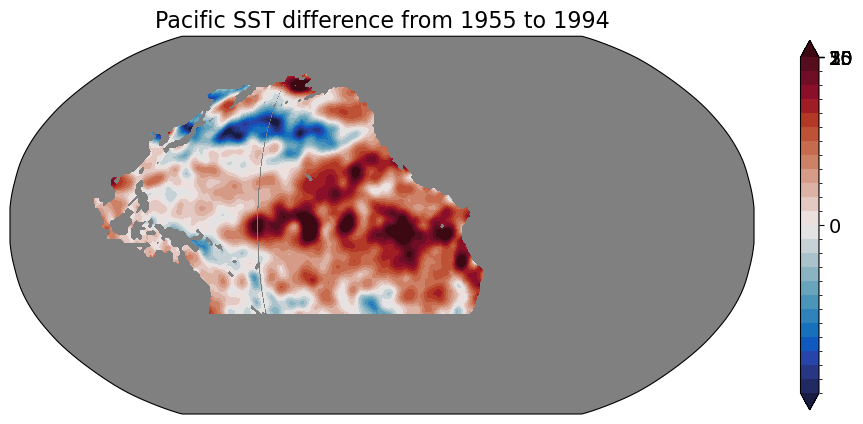

In [88]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = difference55_94.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific SST difference from 1955 to 1994",fontsize=16)

Text(0.5, 1.0, 'Pacific SST difference from 1955 to 2004')

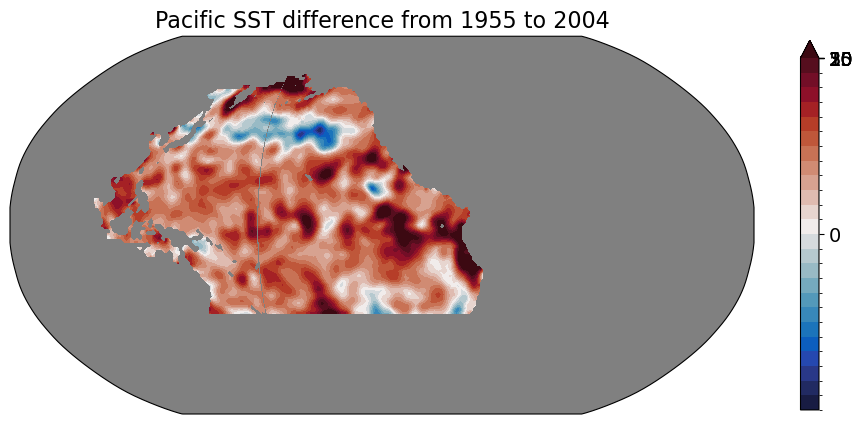

In [89]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = difference55_04.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific SST difference from 1955 to 2004",fontsize=16)

Text(0.5, 1.0, 'Pacific SST difference from 1955 to 2017')

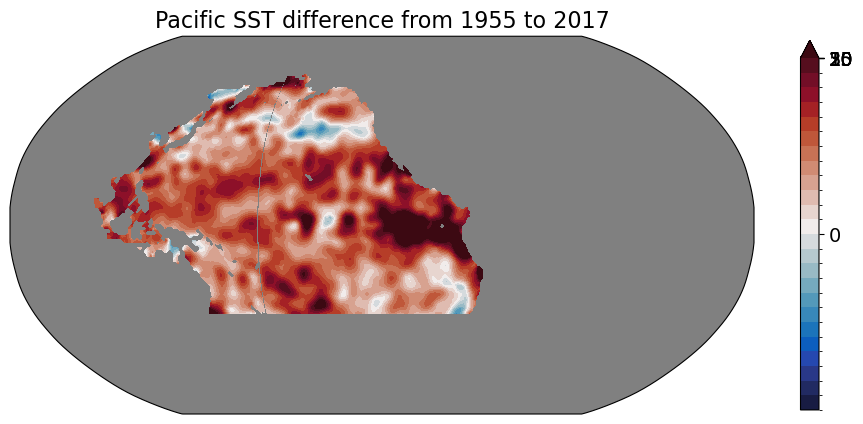

In [90]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = difference55_17.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.balance,
                         vmin=-1,vmax=1,levels=25,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Pacific SST difference from 1955 to 2017",fontsize=16)

Text(0.5, 1.0, 'moo')

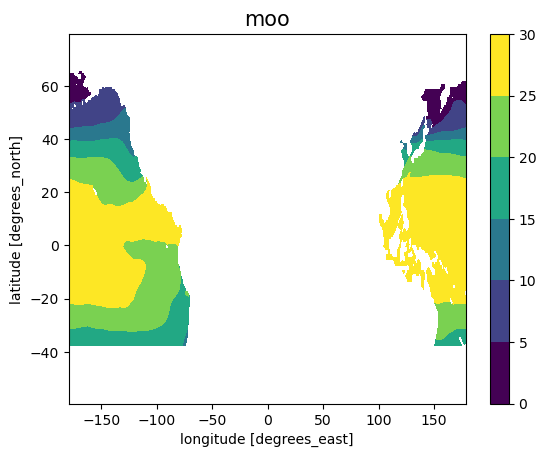

In [91]:
diff = woa18_1965_74_pacific.sel(lon=slice(-190,179), lat=slice(-60,80))
diff.isel(depth=0).plot.contourf()
plt.title("moo", fontsize=15)

In [92]:
woa18_1965_74_pacific

<xarray.DataArray (depth: 102, lat: 180, lon: 360)>
dask.array<mul, shape=(102, 180, 360), dtype=float64, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 438.0

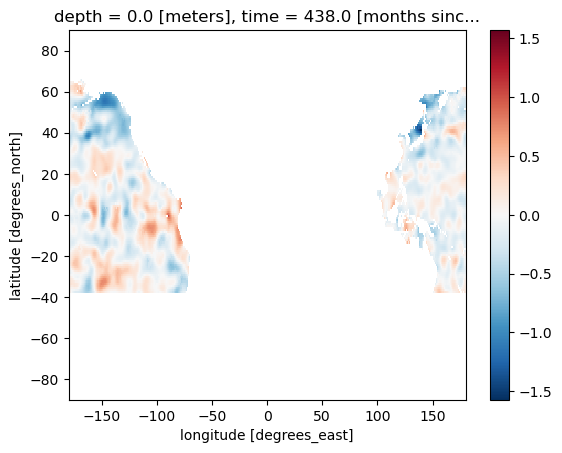

In [93]:
difference55_74.isel(depth=0).plot()

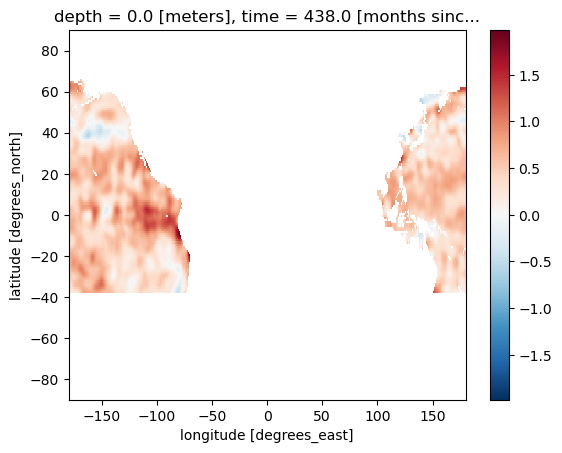

In [94]:
difference55_17.isel(depth=0).plot()

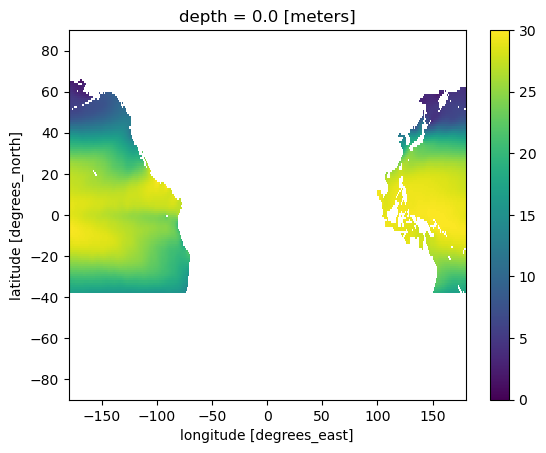

In [95]:
woa18_2005_17_pacific.isel(depth=0).plot( vmin=0, vmax=30)

Text(0.5, 1.0, 'SST Atlantic 2005 to 2017 averaged')

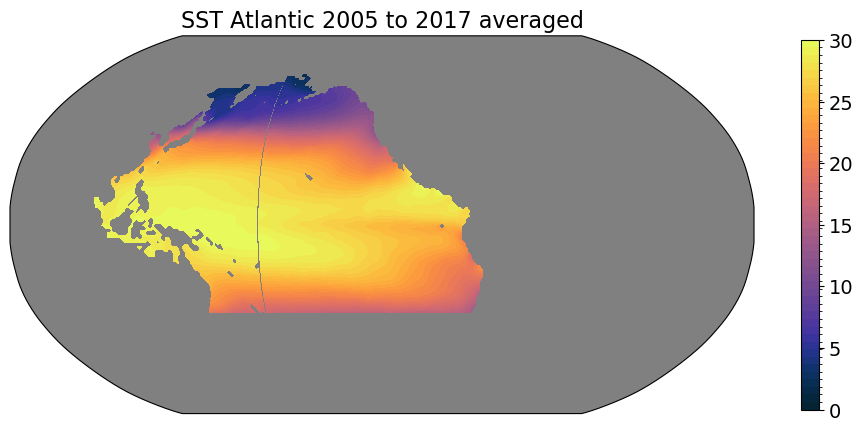

In [96]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_2005_17_pacific.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 2005 to 2017 averaged",fontsize=16)

In [97]:
ocean_heat_content_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [98]:
ocean_heat_content_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 68)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 6.0 18.0 30.0 42.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [99]:
ocean_heat_content_0_2000_pacific = ocean_heat_content_0_2000.yearl_h22_PO
ocean_heat_content_0_700_pacific = ocean_heat_content_0_700.yearl_h22_PO

In [100]:
steric_sealvl_0_700 = xr.open_dataset('/home/ees_student/Final_Project_G1_Mulcahy/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-700_yearly.nc',
                                     decode_times=False)
steric_sealvl_0_2000 = xr.open_dataset('/home/ees_student/Final_Project_G1_Mulcahy/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-2000_yearly.nc', 
                                      decode_times=False)

In [101]:
steric_sealvl_0_700_pacific = steric_sealvl_0_700.yearl_s_mm_PO
steric_sealvl_0_2000_pacific = steric_sealvl_0_2000.yearl_s_mm_PO

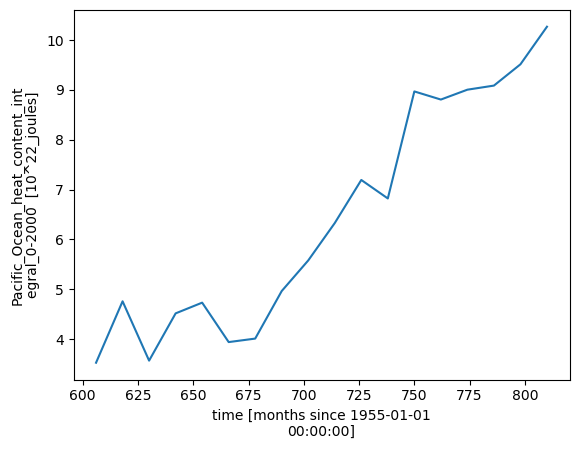

In [102]:
ocean_heat_content_0_2000_pacific.plot()

In [103]:
ocean_heat_content_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 68)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 6.0 18.0 30.0 42.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [107]:
global_heat_content = ocean_heat_content_0_700.yearl_h22_WO

atlantic_heat_content = ocean_heat_content_0_700.yearl_h22_AO

indian_heat_content = ocean_heat_content_0_700.yearl_h22_IO

pacific_heat_content = ocean_heat_content_0_700.yearl_h22_PO

southern_heat_content = ocean_heat_content_0_700.yearl_h22_SH

northern_heat_content = ocean_heat_content_0_700.yearl_h22_NH

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
global_heat = global_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
atlantic_heat = atlantic_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
indian_heat = pacific_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
pacific_heat = southern_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
southern_heat = indian_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022 = pd.date_range("1955","2023", freq="Y")
northern_heat = northern_heat_content.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

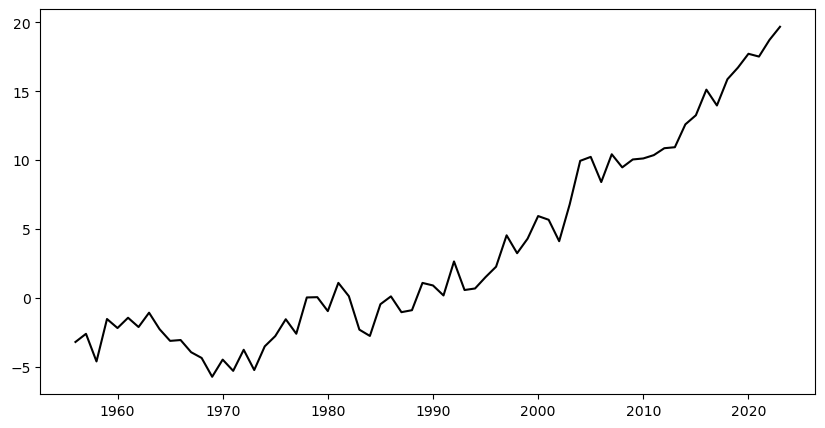

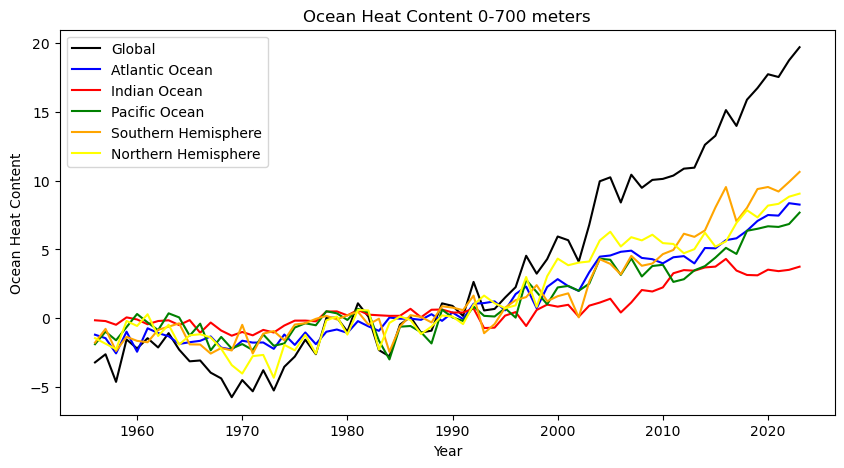

In [111]:
Years = ['1955', '1956', '1957', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966',  '1967', '1968', '1969', '1970', '1971', '1972']
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(global_heat['time'],
       ocean_heat_content_0_700.yearl_h22_WO, color = 'k', label='Global')
ax.plot(atlantic_heat['time'],
    ocean_heat_content_0_700.yearl_h22_AO, color = 'b', label='Atlantic Ocean')
ax.plot(indian_heat['time'],
        ocean_heat_content_0_700.yearl_h22_IO, color = 'red', label='Indian Ocean')
ax.plot(pacific_heat['time'],
        ocean_heat_content_0_700.yearl_h22_PO, color = 'green', label='Pacific Ocean')
ax.plot(southern_heat['time'],
        ocean_heat_content_0_700.yearl_h22_SH, color = 'orange', label='Southern Hemisphere')
ax.plot(northern_heat['time'],
        ocean_heat_content_0_700.yearl_h22_NH, color = 'yellow', label='Northern Hemisphere')

plt.title('Ocean Heat Content 0-700 meters')
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content')
plt.legend()

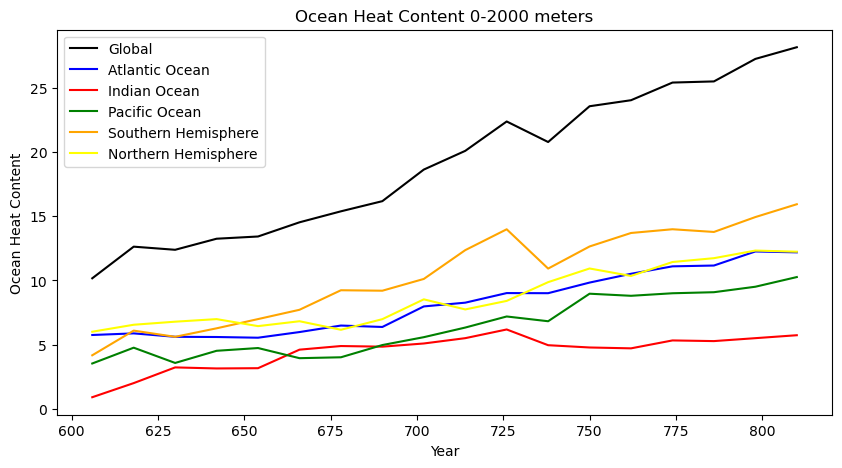

In [112]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(ocean_heat_content_0_2000['time'],
       ocean_heat_content_0_2000.yearl_h22_WO, color = 'k', label='Global')
ax.plot(ocean_heat_content_0_2000['time'],
    ocean_heat_content_0_2000.yearl_h22_AO, color = 'b', label='Atlantic Ocean')
ax.plot(ocean_heat_content_0_2000['time'],
        ocean_heat_content_0_2000.yearl_h22_IO, color = 'red', label='Indian Ocean')
ax.plot(ocean_heat_content_0_2000['time'],
        ocean_heat_content_0_2000.yearl_h22_PO, color = 'green', label='Pacific Ocean')
ax.plot(ocean_heat_content_0_2000['time'],
        ocean_heat_content_0_2000.yearl_h22_SH, color = 'orange', label='Southern Hemisphere')
ax.plot(ocean_heat_content_0_2000['time'],
        ocean_heat_content_0_2000.yearl_h22_NH, color = 'yellow', label='Northern Hemisphere')

plt.title('Ocean Heat Content 0-2000 meters')
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content')
plt.legend()

In [113]:
global_heat_content2 = ocean_heat_content_0_2000.yearl_h22_WO

atlantic_heat_content2 = ocean_heat_content_0_2000.yearl_h22_AO

indian_heat_content2 = ocean_heat_content_0_2000.yearl_h22_IO

pacific_heat_content2 = ocean_heat_content_0_2000.yearl_h22_PO

southern_heat_content2 = ocean_heat_content_0_2000.yearl_h22_SH

northern_heat_content2 = ocean_heat_content_0_2000.yearl_h22_NH

time_axis_1955_2022_2 = pd.date_range("1955","2023", freq="Y")
global_heat2 = global_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022_2 = pd.date_range("1955","2023", freq="Y")
atlantic_heat2 = atlantic_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022_2 = pd.date_range("1955","2023", freq="Y")
indian_heat2 = pacific_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022_2 = pd.date_range("1955","2023", freq="Y")
pacific_heat2 = southern_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022_2 = pd.date_range("1955","2023", freq="Y")
southern_heat2 = indian_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

time_axis_1955_2022_2 = pd.date_range("1955","2023", freq="Y")
northern_heat2 = northern_heat_content2.drop(labels='time').assign_coords(coords={"time":time_axis_1955_2022})

ValueError: conflicting sizes for dimension 'time': length 18 on <this-array> and length 68 on {'time': 'time'}

NameError: name 'global_heat2' is not defined

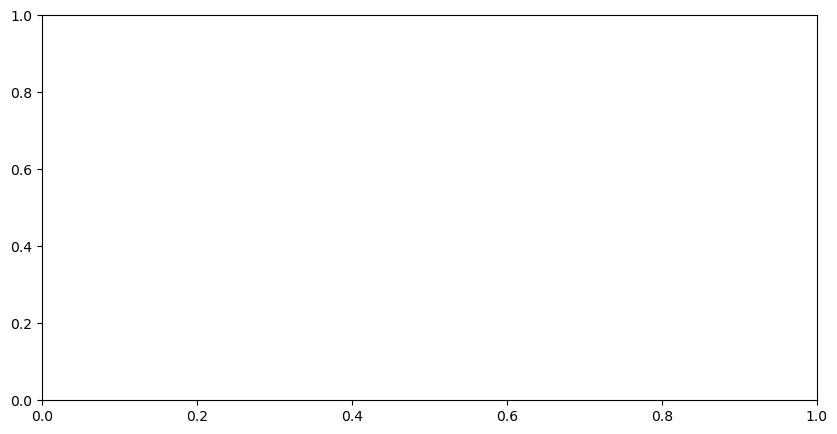

In [114]:
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(global_heat2['time'],
       ocean_heat_content_0_2000.yearl_h22_WO, color = 'k', label='Global')
ax.plot(atlantic_heat2['time'],
    ocean_heat_content_0_2000.yearl_h22_AO, color = 'b', label='Atlantic Ocean')
ax.plot(indian_heat2['time'],
        ocean_heat_content_0_2000.yearl_h22_IO, color = 'red', label='Indian Ocean')
ax.plot(pacific_heat2['time'],
        ocean_heat_content_0_2000.yearl_h22_PO, color = 'green', label='Pacific Ocean')
ax.plot(southern_heat2['time'],
        ocean_heat_content_0_2000.yearl_h22_SH, color = 'orange', label='Southern Hemisphere')
ax.plot(northern_heat2['time'],
        ocean_heat_content_0_2000.yearl_h22_NH, color = 'yellow', label='Northern Hemisphere')

plt.title('Ocean Heat Content 0-2000 meters')
plt.xlabel('Year')
plt.ylabel('Ocean Heat Content')
plt.legend()